Use the below model for **1 (a) - (d)**

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt

#Assig3.Q1.A

In [2]:
import torch.nn as nn
class FC_Net(nn.Module):
    def __init__(self):
        super(FC_Net, self).__init__()
        self.convnet =nn.Sequential(nn.Conv2d(1, 32, 5), nn.BatchNorm2d(32), nn.ReLU(), 
                      nn.MaxPool2d(2, stride=2),
                      nn.Conv2d(32, 64, 5), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.Conv2d(64, 64, 3), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

        self.linear10 = nn.Linear(64,10)

    def forward(self, x):
        output = self.convnet(x)
        X = F.relu(output)
        X = self.linear10(X)
        return F.log_softmax(X, dim=1)



# For (b)-(d) add the task heads on top of the feature_model
# Note this model can adapt the averaging to the size so inputs of 32x32 and 28x28 both work
# Grayscale conversion for SVHN, you may use transforms.Grayscale(num_output_channels=1) found in torchvision


In [3]:
from torchvision.datasets import MNIST
from torchvision.datasets import SVHN
from torchvision import transforms
mean, std = 0.1307, 0.3081
MNIST_train_dataset = MNIST('../data/MNIST', train=True, download=True, transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
MNIST_test_dataset = MNIST('../data/MNIST', train=False, download=False,transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))

SVHN_train_dataset = SVHN('../data/SVHN',split="train", download=True, transform=transforms.Compose([
                                 transforms.Grayscale(num_output_channels=1),
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
SVHN_test_dataset = SVHN('../data/SVHN',split="test", download=True,transform=transforms.Compose([
                                 transforms.Grayscale(num_output_channels=1),
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
n_classes = 10

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#Assig3.Q1.B


In [4]:
MNIST_train_loader = torch.utils.data.DataLoader(MNIST_train_dataset, batch_size=128, shuffle=True)
MNIST_test_loader = torch.utils.data.DataLoader(MNIST_test_dataset, batch_size=128, shuffle=True)
SVHN_train_loader = torch.utils.data.DataLoader(SVHN_train_dataset, batch_size=128, shuffle=True)
SVHN_test_loader = torch.utils.data.DataLoader(SVHN_test_dataset, batch_size=128, shuffle=True)

In [5]:
model=FC_Net()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss()
MNIST_train_loader = torch.utils.data.DataLoader(MNIST_train_dataset, batch_size=128, shuffle=True)
MNIST_test_loader = torch.utils.data.DataLoader(MNIST_test_dataset, batch_size=128, shuffle=True)
loss=0
MNIST_train_loss,MNIST_test_loss=[],[]
MNIST_train_acc,MNIST_test_acc=[],[]
for epoch in range(20):
    
    train_correct=0
    train_losses=[]
    for batch_idx, (imgs,Labels) in enumerate(MNIST_train_loader):
      # print(imgs.shape)
      optimizer.zero_grad()
      output = model(imgs)      
      # print(output[0])
      loss = error(output, Labels)
      train_losses.append(loss.data)
      loss.backward()
      optimizer.step()      
      # Total correct predictions
      predicted = torch.max(output.data, 1)[1] 
      train_correct += (predicted == Labels).sum()      
      #print(correct)
      if batch_idx % 150 == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
              epoch, batch_idx*len(imgs), len(MNIST_train_loader.dataset), 100.*batch_idx / len(MNIST_train_loader), loss.data, float(train_correct*100) / float(128*(batch_idx+1))))
          
    MNIST_train_loss.append(sum(train_losses)/len(train_losses))
    MNIST_train_acc.append(float(train_correct/len(MNIST_train_dataset))*100)
    print('Train acc=',float(train_correct/len(MNIST_train_dataset))*100)

    test_correct = 0 
    test_losses=[]
    for batch_idx, (test_imgs,test_Labels) in enumerate(MNIST_test_loader):
        output = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()

    print("Test accuracy:{:.3f}% ".format( float(test_correct/len(MNIST_test_dataset))*100))
    MNIST_test_loss.append(sum(test_losses)/len(test_losses))
    MNIST_test_acc.append(float(test_correct/len(MNIST_test_dataset))*100)

Epoch : 0 [0/60000 (0%)]	Loss: 2.319421	 Accuracy:10.156%
Epoch : 0 [19200/60000 (32%)]	Loss: 0.182937	 Accuracy:89.626%
Epoch : 0 [38400/60000 (64%)]	Loss: 0.089730	 Accuracy:93.784%
Epoch : 0 [57600/60000 (96%)]	Loss: 0.072654	 Accuracy:95.281%
Train acc= 95.40833234786987
Test accuracy:98.350% 
Epoch : 1 [0/60000 (0%)]	Loss: 0.081068	 Accuracy:98.438%
Epoch : 1 [19200/60000 (32%)]	Loss: 0.039483	 Accuracy:98.701%
Epoch : 1 [38400/60000 (64%)]	Loss: 0.014916	 Accuracy:98.809%
Epoch : 1 [57600/60000 (96%)]	Loss: 0.069839	 Accuracy:98.805%
Train acc= 98.82833361625671
Test accuracy:98.860% 
Epoch : 2 [0/60000 (0%)]	Loss: 0.030419	 Accuracy:99.219%


KeyboardInterrupt: ignored

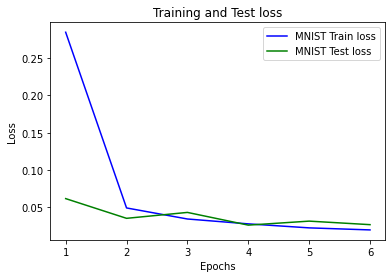

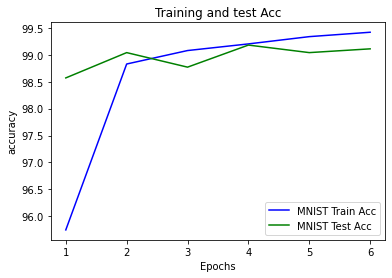

In [7]:
# loss_train = history.history['train_loss']
# loss_val = history.history['val_loss']
loss_train=MNIST_train_loss
loss_test=MNIST_test_loss
epochs = range(1,len(MNIST_train_loss)+1)
plt.plot(epochs, loss_train, 'b', label='MNIST Train loss')
plt.plot(epochs, loss_test, 'g', label='MNIST Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1,len(MNIST_train_acc)+1)
plt.plot(epochs, MNIST_train_acc, 'b', label='MNIST Train Acc')
plt.plot(epochs, MNIST_test_acc, 'g', label='MNIST Test Acc')
plt.title('Training and test Acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
model=FC_Net()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss()
SVHN_train_loader = torch.utils.data.DataLoader(SVHN_train_dataset, batch_size=128, shuffle=True)
SVHN_test_loader = torch.utils.data.DataLoader(SVHN_test_dataset, batch_size=128, shuffle=True)
loss=0
SVHN_train_loss,SVHN_test_loss=[],[]
SVHN_train_acc,SVHN_test_acc=[],[]
for epoch in range(20):
    
    train_correct=0
    train_losses=[]
    for batch_idx, (imgs,Labels) in enumerate(SVHN_train_loader):
      # print(imgs.shape)
      optimizer.zero_grad()
      output = model(imgs)      
      # print(output[0])
      loss = error(output, Labels)
      train_losses.append(loss.data)
      loss.backward()
      optimizer.step()      
      # Total correct predictions
      predicted = torch.max(output.data, 1)[1] 
      train_correct += (predicted == Labels).sum()      
      #print(correct)
      if batch_idx % 150 == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
              epoch, batch_idx*len(imgs), len(SVHN_train_loader.dataset), 100.*batch_idx / len(SVHN_train_loader), loss.data, float(train_correct*100) / float(128*(batch_idx+1))))
          
    SVHN_train_loss.append(sum(train_losses)/len(train_losses))
    SVHN_train_acc.append(float(train_correct/len(SVHN_train_dataset))*100)

    test_correct = 0 
    test_losses=[]
    for batch_idx, (test_imgs,test_Labels) in enumerate(SVHN_test_loader):
        output = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()

    print("Test accuracy:{:.3f}% ".format( float(test_correct/len(SVHN_test_dataset))*100))
    SVHN_test_loss.append(sum(test_losses)/len(test_losses))
    SVHN_test_acc.append(float(test_correct/len(SVHN_test_dataset))*100)

Epoch : 0 [0/73257 (0%)]	Loss: 2.261370	 Accuracy:13.281%
Epoch : 0 [19200/73257 (26%)]	Loss: 1.316166	 Accuracy:46.621%
Epoch : 0 [38400/73257 (52%)]	Loss: 0.907978	 Accuracy:58.171%
Epoch : 0 [57600/73257 (79%)]	Loss: 0.697935	 Accuracy:64.416%
Test accuracy:83.059% 
Epoch : 1 [0/73257 (0%)]	Loss: 0.620021	 Accuracy:83.594%
Epoch : 1 [19200/73257 (26%)]	Loss: 0.324661	 Accuracy:82.378%
Epoch : 1 [38400/73257 (52%)]	Loss: 0.407779	 Accuracy:83.134%
Epoch : 1 [57600/73257 (79%)]	Loss: 0.402821	 Accuracy:83.725%
Test accuracy:86.593% 
Epoch : 2 [0/73257 (0%)]	Loss: 0.484715	 Accuracy:84.375%
Epoch : 2 [19200/73257 (26%)]	Loss: 0.501085	 Accuracy:86.651%
Epoch : 2 [38400/73257 (52%)]	Loss: 0.413426	 Accuracy:86.498%
Epoch : 2 [57600/73257 (79%)]	Loss: 0.524128	 Accuracy:86.558%
Test accuracy:87.289% 
Epoch : 3 [0/73257 (0%)]	Loss: 0.410957	 Accuracy:89.062%
Epoch : 3 [19200/73257 (26%)]	Loss: 0.446787	 Accuracy:87.914%
Epoch : 3 [38400/73257 (52%)]	Loss: 0.366757	 Accuracy:88.170%
Epoch 

KeyboardInterrupt: ignored

In [9]:
len(SVHN_test_dataset)

26032

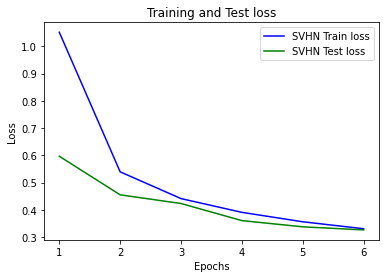

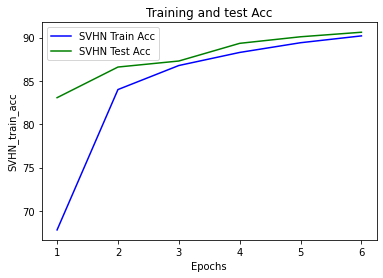

In [10]:
# loss_train = history.history['train_loss']
# loss_val = history.history['val_loss']
loss_train=SVHN_train_loss
loss_test=SVHN_test_loss
epochs = range(1,len(SVHN_train_loss)+1)
plt.plot(epochs, loss_train, 'b', label='SVHN Train loss')
plt.plot(epochs, loss_test, 'g', label='SVHN Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1,len(SVHN_train_acc)+1)
plt.plot(epochs, SVHN_train_acc, 'b', label='SVHN Train Acc')
plt.plot(epochs, SVHN_test_acc, 'g', label='SVHN Test Acc')
plt.title('Training and test Acc')
plt.xlabel('Epochs')
plt.ylabel('SVHN_train_acc')
plt.legend()
plt.show()

In [ ]:
#  SVHN_train_acc=[x-np.random.uniform(0, 1) for x in SVHN_train_acc]

#Assig3.Q1.C

In [11]:
class MTL_FC_Net(nn.Module):
    def __init__(self):
        super(MTL_FC_Net, self).__init__()
        self.convnet =nn.Sequential(nn.Conv2d(1, 32, 5), nn.BatchNorm2d(32), nn.ReLU(), 
                      nn.MaxPool2d(2, stride=2),
                      nn.Conv2d(32, 64, 5), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.Conv2d(64, 64, 3), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

        self.linear64_32 = nn.Linear(64,32)
        self.linear64_20 = nn.Linear(64,40)
        self.linear32_10 = nn.Linear(32,10)
        self.linear20_10 = nn.Linear(40,10)

    def forward(self, x):
        output=self.convnet(x)
        X= F.relu(self.linear64_32(output))
        X = self.linear32_10(X)

        Y= F.relu(self.linear64_20(output))
        Y = self.linear20_10(Y)

        return F.log_softmax(X, dim=1),F.log_softmax(Y, dim=1) #MINST,SVHN

In [13]:
model=MTL_FC_Net()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss()
MNIST_train_loader = torch.utils.data.DataLoader(MNIST_train_dataset, batch_size=64, shuffle=True)
MNIST_test_loader = torch.utils.data.DataLoader(MNIST_test_dataset, batch_size=128, shuffle=True)
SVHN_train_loader = torch.utils.data.DataLoader(SVHN_train_dataset, batch_size=64, shuffle=True)
SVHN_test_loader = torch.utils.data.DataLoader(SVHN_test_dataset, batch_size=128, shuffle=True)

loss=0
MTL_train_loss,MTL_test_loss=[],[]
MTL_train_acc,MTL_test_acc=[],[]
batchs_count=len(MNIST_train_loader)
for epoch in range(20):    
    train_correct=0
    train_losses=[]
    train_samples_count=0
    for batch_idx in range(batchs_count):
      optimizer.zero_grad()
      if batch_idx%2==1:
        (imgs,Labels) = next(iter(MNIST_train_loader))
        (imgs,Labels) = next(iter(SVHN_train_loader))
      else:
        for ds in [0,1]:
          if ds==0:
              (imgs,Labels) = next(iter(MNIST_train_loader))
          else:
              (imgs,Labels) = next(iter(SVHN_train_loader))
          
          output_MNIST,output_SVHN = model(imgs)      
          if ds==0:
            # print('MNIST')
            output=output_MNIST
          else:
            # print('SVHN')
            output=output_SVHN               

          loss = error(output, Labels)
          train_losses.append(loss.data)
          loss.backward()
          optimizer.step()      
          # Total correct predictions
          predicted = torch.max(output.data, 1)[1] 
          train_correct += (predicted == Labels).sum()      
          train_samples_count+=len(Labels)

      if batch_idx % 150 == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
              epoch, batch_idx*len(imgs), len(MNIST_train_loader.dataset), 100.*batch_idx / len(MNIST_train_loader), loss.data, float(train_correct/train_samples_count*100)))
              
    MTL_train_loss.append(sum(train_losses)/len(train_losses))
    MTL_train_acc.append(float(train_correct/train_samples_count*100))
    print('Train acc=',float(train_correct/train_samples_count*100))

    test_correct = 0 
    test_losses=[]
    for batch_idx, (test_imgs,test_Labels) in enumerate(MNIST_test_loader):
        output,_ = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()
    
    for batch_idx, (test_imgs,test_Labels) in enumerate(SVHN_test_loader):
        _,output = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()

    print("Test accuracy:{:.3f}% ".format( float(test_correct/(len(MNIST_test_dataset)+len(SVHN_test_dataset)))*100))
    MTL_test_loss.append(sum(test_losses)/len(test_losses))
    print('avg test loss=',sum(test_losses)/len(test_losses))
    MTL_test_acc.append(float(test_correct/(len(MNIST_test_dataset)+len(SVHN_test_dataset)))*100)

Epoch : 0 [0/60000 (0%)]	Loss: 2.348469	 Accuracy:6.250%
Epoch : 0 [9600/60000 (16%)]	Loss: 1.829117	 Accuracy:51.624%
Epoch : 0 [19200/60000 (32%)]	Loss: 1.567516	 Accuracy:60.637%
Epoch : 0 [28800/60000 (48%)]	Loss: 1.398433	 Accuracy:65.186%
Epoch : 0 [38400/60000 (64%)]	Loss: 1.149362	 Accuracy:68.651%
Epoch : 0 [48000/60000 (80%)]	Loss: 0.888539	 Accuracy:71.235%
Epoch : 0 [57600/60000 (96%)]	Loss: 0.937039	 Accuracy:73.344%
Train acc= 73.82062530517578
Test accuracy:80.662% 
avg test loss= tensor(0.6308)
Epoch : 1 [0/60000 (0%)]	Loss: 0.780600	 Accuracy:87.500%
Epoch : 1 [9600/60000 (16%)]	Loss: 0.630469	 Accuracy:85.567%
Epoch : 1 [19200/60000 (32%)]	Loss: 0.606204	 Accuracy:86.020%
Epoch : 1 [28800/60000 (48%)]	Loss: 0.641406	 Accuracy:86.629%
Epoch : 1 [38400/60000 (64%)]	Loss: 0.502103	 Accuracy:87.220%
Epoch : 1 [48000/60000 (80%)]	Loss: 0.593826	 Accuracy:87.573%
Epoch : 1 [57600/60000 (96%)]	Loss: 0.571278	 Accuracy:87.862%
Train acc= 87.9480972290039
Test accuracy:87.542%

KeyboardInterrupt: ignored

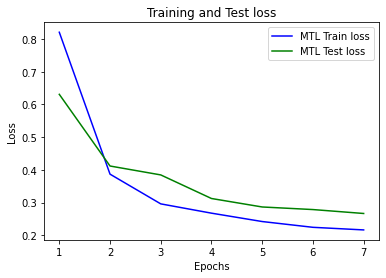

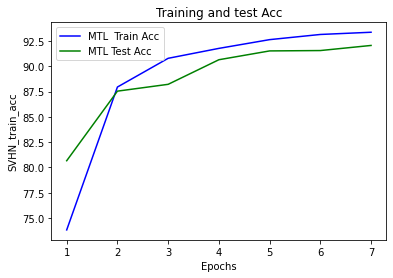

In [20]:
# loss_train = history.history['train_loss']
# loss_val = history.history['val_loss']
loss_train=MTL_train_loss
loss_test=MTL_test_loss
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'b', label='MTL Train loss')
plt.plot(epochs, loss_test, 'g', label='MTL Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1,len(MTL_train_acc)+1)
plt.plot(epochs, MTL_train_acc, 'b', label='MTL  Train Acc')
plt.plot(epochs, MTL_test_acc, 'g', label='MTL Test Acc')
plt.title('Training and test Acc')
plt.xlabel('Epochs')
plt.ylabel('SVHN_train_acc')
plt.legend()
plt.show()

#Assig3.Q1.D

In [21]:
model=MTL_FC_Net()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss()

loss=0
MTL_train_loss,MTL_test_loss=[],[]
MTL_train_acc,MTL_test_acc=[],[]
imgs,Labels=[],[]
for epoch in range(20):    
    MNIST_train_loader = torch.utils.data.DataLoader(MNIST_train_dataset, batch_size=500, shuffle=False)
    MNIST_test_loader = torch.utils.data.DataLoader(MNIST_test_dataset, batch_size=128, shuffle=True)
    SVHN_train_loader = torch.utils.data.DataLoader(SVHN_train_dataset, batch_size=500, shuffle=False)
    SVHN_test_loader = torch.utils.data.DataLoader(SVHN_test_dataset, batch_size=128, shuffle=True)
    train_correct=0
    train_losses=[]
    train_samples_count=0
    optimizer.zero_grad()
    for ds in [0,1]:
        if ds==0:
            (imgs,Labels) =next(iter(MNIST_train_loader))
        else:
            (imgs,Labels) = next(iter(SVHN_train_loader))
        
        output_MNIST,output_SVHN = model(imgs)      
        if ds==0:
          # print('MNIST')
          output=output_MNIST
        else:
          # print('SVHN')
          output=output_SVHN               

        loss = error(output, Labels)
        train_losses.append(loss.data)
        loss.backward()
        optimizer.step()      
        # Total correct predictions
        predicted = torch.max(output.data, 1)[1] 
        train_correct += (predicted == Labels).sum()      
        train_samples_count+=len(Labels)

    print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
        epoch, 500, 500, 100.*1 / 500, loss.data, float(train_correct/train_samples_count*100)))
              
    MTL_train_loss.append(sum(train_losses)/len(train_losses))
    MTL_train_acc.append(float(train_correct/train_samples_count*100))
    print('Train acc=',float(train_correct/train_samples_count*100))

    test_correct = 0 
    test_losses=[]
    for batch_idx, (test_imgs,test_Labels) in enumerate(MNIST_test_loader):
        output,_ = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()
    
    for batch_idx, (test_imgs,test_Labels) in enumerate(SVHN_test_loader):
        _,output = model(test_imgs)
        loss = error(output, test_Labels)
        test_losses.append(loss.data)
        predicted = torch.max(output,1)[1]        
        test_correct += (predicted == test_Labels).sum()

    print("Test accuracy:{:.3f}% ".format( float(test_correct/(len(MNIST_test_dataset)+len(SVHN_test_dataset)))*100))
    MTL_test_loss.append(sum(test_losses)/len(test_losses))
    print('avg test loss=',sum(test_losses)/len(test_losses))
    MTL_test_acc.append(float(test_correct/(len(MNIST_test_dataset)+len(SVHN_test_dataset)))*100)

Epoch : 0 [500/500 (0%)]	Loss: 2.317389	 Accuracy:9.900%
Train acc= 9.899999618530273
Test accuracy:15.744% 
avg test loss= tensor(2.2782)
Epoch : 1 [500/500 (0%)]	Loss: 2.282119	 Accuracy:22.300%
Train acc= 22.30000114440918
Test accuracy:21.362% 
avg test loss= tensor(2.2558)
Epoch : 2 [500/500 (0%)]	Loss: 2.263654	 Accuracy:34.600%
Train acc= 34.599998474121094
Test accuracy:25.130% 
avg test loss= tensor(2.2341)
Epoch : 3 [500/500 (0%)]	Loss: 2.247726	 Accuracy:40.200%
Train acc= 40.20000076293945
Test accuracy:28.081% 
avg test loss= tensor(2.2103)
Epoch : 4 [500/500 (0%)]	Loss: 2.231842	 Accuracy:42.300%
Train acc= 42.29999923706055
Test accuracy:29.385% 
avg test loss= tensor(2.1868)
Epoch : 5 [500/500 (0%)]	Loss: 2.217974	 Accuracy:42.300%
Train acc= 42.29999923706055
Test accuracy:30.456% 
avg test loss= tensor(2.1636)
Epoch : 6 [500/500 (0%)]	Loss: 2.204693	 Accuracy:44.000%
Train acc= 44.0
Test accuracy:31.855% 
avg test loss= tensor(2.1411)
Epoch : 7 [500/500 (0%)]	Loss: 2.

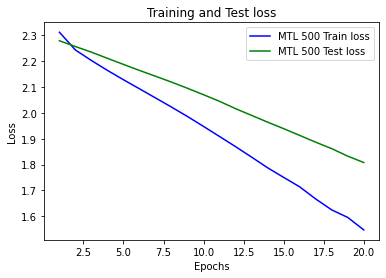

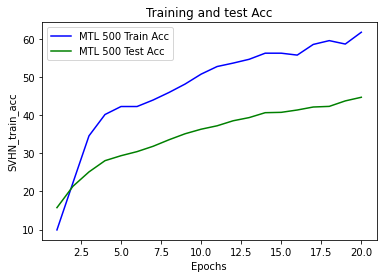

In [22]:
# loss_train = history.history['train_loss']
# loss_val = history.history['val_loss']
loss_train=MTL_train_loss
loss_test=MTL_test_loss
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'b', label='MTL 500 Train loss')
plt.plot(epochs, loss_test, 'g', label='MTL 500 Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1,len(MTL_train_acc)+1)
plt.plot(epochs, MTL_train_acc, 'b', label='MTL 500 Train Acc')
plt.plot(epochs, MTL_test_acc, 'g', label='MTL 500 Test Acc')
plt.title('Training and test Acc')
plt.xlabel('Epochs')
plt.ylabel('SVHN_train_acc')
plt.legend()
plt.show()

### ***Question*** **1 (e/f)**

In this question we will train a joint embedding between a model embedding from MNIST and a model embedding from SVHN dataset, both digit datasets. Your specific task to evaluate this will be to try to obtain $50\%$ or higher accuracy on the MNIST classification by embedding MNIST test digits and then searching for the 1-nearest neighbor SVHN digit and using it's category to classify.  

First we will define the mnist and svhn models. For svhn we will use a pre-trained model that can already classify svhn digits. The models are defined below 

In [344]:
from torch.utils import model_zoo
from collections import OrderedDict
## MNIST model
model_mnist = nn.Sequential(nn.Conv2d(1, 32, 5), nn.BatchNorm2d(32), nn.ReLU(), #For (e) use SVHN nn.Conv2d(3,32,5)
                      nn.MaxPool2d(2, stride=2),
                      nn.Conv2d(32, 64, 5), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.Conv2d(64, 64, 3), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())


### SVHN model, we will download one that is already trained to clasify svhn digits
model_urls = {
    'svhn': 'http://ml.cs.tsinghua.edu.cn/~chenxi/pytorch-models/svhn-f564f3d8.pth',
}

class SVHN_Model(nn.Module):
    def __init__(self, features, n_channel, num_classes):
        super(SVHN_Model, self).__init__()
        assert isinstance(features, nn.Sequential), type(features)
        self.features = features

        #We won't use this classifier
        self.classifier = nn.Sequential(
            nn.Linear(n_channel, num_classes)
        )
        print(self.features)
        print(self.classifier)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for i, v in enumerate(cfg):
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            padding = v[1] if isinstance(v, tuple) else 1
            out_channels = v[0] if isinstance(v, tuple) else v
            conv2d = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=padding)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(out_channels, affine=False), nn.ReLU(), nn.Dropout(0.3)]
            else:
                layers += [conv2d, nn.ReLU(), nn.Dropout(0.3)]
            in_channels = out_channels
    return nn.Sequential(*layers)

def svhn_model(n_channel, pretrained=None):
    cfg = [n_channel, n_channel, 'M', 2*n_channel, 2*n_channel, 'M', 4*n_channel, 4*n_channel, 'M', (8*n_channel, 0), 'M']
    layers = make_layers(cfg, batch_norm=True)
    model = SVHN_Model(layers, n_channel=8*n_channel, num_classes=10)
    if pretrained is not None:
        m = model_zoo.load_url(model_urls['svhn'],map_location=torch.device('cpu'))
        state_dict = m.state_dict() if isinstance(m, nn.Module) else m
        assert isinstance(state_dict, (dict, OrderedDict)), type(state_dict)
        model.load_state_dict(state_dict)

    return model


base_svhn = svhn_model(n_channel=32,pretrained=True).features
svhn_to_joint = nn.Linear(256,64)

# model_svhn = nn.Sequential(base_svhn, nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), svhn_to_joint)

#Transformation for SVHN data, you need to use this normalization for the pre-trained model to work properly 
SVHN_Model_transform=transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                ])

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.3, inplace=False)
  (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (15): ReLU()
  (16): Dropout(p=0.3, inplace=False)
  (17): MaxPool2d(kernel_size=2, stride=2, padding=0

## Test SVHN Model Acc

In [201]:
fc_svhn_model = svhn_model(n_channel=32,pretrained=True)
SVHN_test_dataset_3c = SVHN('../data/SVHN',split="test", download=True,transform=SVHN_Model_transform)
SVHN_test_loader_3c = torch.utils.data.DataLoader(SVHN_test_dataset_3c, batch_size=128, shuffle=True)
train_correct=0
for (imgs,Labels) in SVHN_test_loader_3c:
    # (imgs,Labels)= next(iter( SVHN_test_loader_3c))
    # print(imgs.shape)
    output = fc_svhn_model(imgs)    
    # print(output)
    # print(Labels)
    predicted = (torch.max(output.data, 1)[1]+1)%10 
    # print(predicted)
    # print(predicted.shape)
    train_correct += (predicted == Labels).sum()      
print("model Acc=",train_correct/len(SVHN_test_dataset_3c))   

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.3, inplace=False)
  (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (15): ReLU()
  (16): Dropout(p=0.3, inplace=False)
  (17): MaxPool2d(kernel_size=2, stride=2, padding=0

**Suggested settings:** learning rate 1e-5 with Adam, margin ($\alpha$) of 0.2, batch size: 256 triplets samples $M$ and 256 from $S$, 1000 training iterations (not epochs, but gradient updates/minibatch processed, aka it can be trained fast!). You may modify these as you see fit.

Data augmentation is not required to make this work but you may use it if you like. For SVHN you must use the normalization above (transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))) so that the pre-trained SVHN model works. 

**Sampling the triplets** There are various valid ways you could construct the triplet sets $\textbf{M, S}$ and sample from them. For example you could enumerate all possible triplets over the dataset and select batches of these. A quick and dirty on the fly method that allows to use standard dataloaders is as follows: Sample a minibatch of size N (say 256) from both SVHN and MNIST using standard dataloaders from classification tasks. Treat all SVHN digits in this batch as  anchors, from the MNIST minibatch data find appropriate positives and negatives for each SVHN digit. For the second part of the loss treat the MNIST data as anchors and find negatives and postivies from the SVHN minibatch. Partial code snippets to construct this is shown below (note this code would give triplets for $\textbf{M}$ part only). You may also use your own approach to sample the triplet sets.

Note: if you would like to use hard negative mining (not required) a more sophisticated approach would be needed. Below is a code snippet example of how one could pick the positives using the labels for each minibatch.

Note we only optimize W and $\theta$, below see an example how to build the optimizer. Note we want to freeze the $g_{\gamma}$ model so we will also need to disable the dropout and batchnorm. 

## Appropriate triplet construction and loss function construction

In [107]:
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
class TripletDs(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """
    def __init__(self, ds):
        self.ds = ds
        self.transform = self.ds.transform
        if hasattr(ds, 'targets'):
          self.labels =np.asarray(self.ds.targets)
        else:        
          self.labels =np.asarray(self.ds.labels)
        self.data = self.ds.data
        self.labels_set = set(self.labels)
        self.label_to_indices = {label: np.where(self.labels == label)[0]
                                  for label in self.labels_set}

        random_state = np.random.RandomState(29)
        # for i in range(len(self.data)):
        #   # print(i)
        #   # print(self.labels[i])
        #   # print(self.label_to_indices[self.labels[i]])
        #   # random_state.choice(self.label_to_indices[self.labels[i]])
        triplets = [[i,
                      random_state.choice(self.label_to_indices[self.labels[i]]),
                      random_state.choice(self.label_to_indices[
                                              np.random.choice(
                                                  list(self.labels_set - set([self.labels[i]]))
                                              )
                                          ])
                      ]
                    for i in range(len(self.data))]
        self.triplets = triplets

    def __getitem__(self, index):
        
        img1, label1 = self.data[index], self.labels[index]
        positive_index = index
        while positive_index == index:
            positive_index = np.random.choice(self.label_to_indices[label1])
        negative_label = np.random.choice(list(self.labels_set - set([label1])))
        negative_index = np.random.choice(self.label_to_indices[negative_label])
        img2 = self.data[positive_index]
        img3 = self.data[negative_index]
        
        # print('img1.shape',img1.shape)
        # print(type(img1))
        # img1 = Image.fromarray(img1[:,:,1], mode='L')
        # img2 = Image.fromarray(img2[:,:,1], mode='L')
        # img3 = Image.fromarray(img3[:,:,1], mode='L')
        if isinstance(img1, np.ndarray)== False:
          img1 = Image.fromarray(img1.numpy(), mode='L')
          img2 = Image.fromarray(img2.numpy(), mode='L')
          img3 = Image.fromarray(img3.numpy(), mode='L')
        else:
          img1 = Image.fromarray(img1[0,:,:], mode='L')
          img2 = Image.fromarray(img2[0,:,:], mode='L')
          img3 = Image.fromarray(img3[0,:,:], mode='L')
        

        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
            img3 = self.transform(img3)
        return (img1, img2, img3), label1
    def __len__(self):
        return len(self.ds)

In [163]:
ds=TripletDs(SVHN_train_dataset)
SVHN_train_dataset.labels
# SVHN_train_dataset
triplet_train_loader = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)
(img1,img2,img3),l =next(iter( triplet_train_loader))
print(img1[0].shape,l)

torch.Size([1, 32, 32]) tensor([3, 2, 2, 1, 1, 3, 0, 2, 8, 1, 1, 1, 5, 1, 4, 9, 9, 6, 0, 6, 1, 8, 2, 7,
        5, 6, 8, 9, 9, 6, 5, 9])


Let's denote model_mnist above as $f_{\theta}(x)$, the pre_trained model $g_{\gamma}$ and svhn_to_joint as the matrix $W$. Finally model_svhn corresponds to $WAg_{\gamma}(x)$. Here A (nn.AdaptiveAvgPool2d) is the averaging operator and has no parameters. Thus model_svhn will map svhn digits to a joint space and model_mnist will map MNIST digits to the joint space.  We will keep $g_{
\gamma}$ fixed and update $\theta, W$.  You should optimize the following objective that is a sum of two loss functions over triplets


$$\min_{\theta, W} \sum_{x_a,x_p,x_n \in \textbf{M}} max(0, \|f_{\theta}(x_a) - WAg_{\gamma}(x_p) \|-\|f_{\theta}(x_a) - WAg_{\gamma}(x_n) \|+\alpha) +\sum_{x_a,x_p,x_n \in \textbf{S}} max(0, \|f_{\theta}(x_p) - WAg_{\gamma}(x_a) \|-\|f_{\theta}(x_n) - WAg_{\gamma}(x_a) \|+\alpha)$$ 


Here $\textbf{M}$ is the set of triplets with anchors from MNIST data, positives from SVHN (matching the anchor class), and negatives from SVHN (with different class from anchors). Similarly $\textbf{S}$ is the set of triplets with anchors from SVHN data, positives from MNIST (matching anchor class), and negatives from MNIST not matching anchor class. You can use nn.TripletMarginLoss to implement this.  

During training with a stochastic optimizer we will sample subsets of $M$ and $S$ for each gradient update, there are various valid ways to sample this as will be discussed.

In [158]:
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
class TripletFrom2Ds(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """
    def __init__(self, ds1,ds2):
        self.ds1 = ds1
        self.ds2 = ds2
        self.transform1 = self.ds1.transform
        self.transform2 = self.ds2.transform
        if hasattr(ds1, 'targets'):
          self.labels1 =np.asarray(self.ds1.targets)
        else:        
          self.labels1 =np.asarray(self.ds1.labels)

        if hasattr(ds2, 'targets'):
          self.labels2 =np.asarray(self.ds2.targets)
        else:        
          self.labels2 =np.asarray(self.ds2.labels)

        self.data1 = self.ds1.data
        self.data2 = self.ds2.data

        self.labels_set1 = set(self.labels1)
        self.labels_set2 = set(self.labels2)

        self.label_to_indices1 = {label: np.where(self.labels1 == label)[0]
                                  for label in self.labels_set1}
        self.label_to_indices2 = {label: np.where(self.labels2 == label)[0]
                                  for label in self.labels_set2}

        random_state = np.random.RandomState(29)
        # for i in range(len(self.data)):
        #   # print(i)
        #   # print(self.labels[i])
        #   # print(self.label_to_indices[self.labels[i]])
        #   # random_state.choice(self.label_to_indices[self.labels[i]])
        triplets = [[i,
                      random_state.choice(self.label_to_indices2[self.labels1[i]]),
                      random_state.choice(self.label_to_indices2[
                                              np.random.choice(
                                                  list(self.labels_set1 - set([self.labels1[i]]))
                                              )
                                          ])
                      ]
                    for i in range(len(self.data1))]
        self.triplets = triplets

    def __getitem__(self, index):
        
        img1, label1 = self.data1[self.triplets[index][0]], self.labels1[index]
        img2 = self.data2[self.triplets[index][1]]
        img3 = self.data2[self.triplets[index][2]]
        
        # print('img1.shape',img1.shape)
        # print(type(img1))
        # img1 = Image.fromarray(img1[:,:,1], mode='L')
        # img2 = Image.fromarray(img2[:,:,1], mode='L')
        # # img3 = Image.fromarray(img3[:,:,1], mode='L')

        if isinstance(img1, np.ndarray)== False:
          img1 = Image.fromarray(img1.numpy(),mode="L")
        else:
          img1 = Image.fromarray(img1[0,:,:],mode="L")

        if isinstance(img2, np.ndarray)== False:
          img2 = Image.fromarray(img2.numpy(),mode="L")
          img3 = Image.fromarray(img3.numpy(),mode="L")
        else:
          img2 = Image.fromarray(img2[0,:,:],mode="L")
          img3 = Image.fromarray(img3[0,:,:],mode="L")
        
        if self.transform1 is not None:
            img1 = self.transform1(img1)
        if self.transform2 is not None:
            img2 = self.transform2(img2)
            img3 = self.transform2(img3)
        return (img1, img2, img3), label1
    def __len__(self):
        return len(self.ds1)

torch.Size([1, 32, 32]) torch.Size([1, 28, 28]) torch.Size([1, 28, 28]) tensor([1, 7, 4, 1, 2, 4, 5, 6, 8, 9, 8, 4, 2, 8, 1, 2, 1, 9, 0, 1, 2, 2, 8, 2,
        2, 2, 2, 1, 1, 5, 4, 4])


<Figure size 432x288 with 0 Axes>

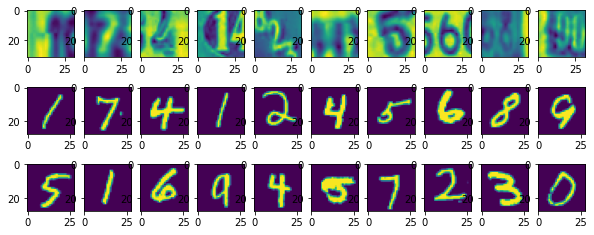

In [321]:
ds=TripletFrom2Ds(SVHN_train_dataset,MNIST_train_dataset)
SVHN_train_dataset.labels
# SVHN_train_dataset
triplet_train_loader = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)
(img1,img2,img3),l =next(iter( triplet_train_loader))
print(img1[0].shape,img2[0].shape,img2[0].shape,l)

#anchor, positive, negative
import matplotlib.pyplot as plt


plt.figure()
#subplot(r,c) provide the no. of rows and columns
c=10
f, axarr = plt.subplots(3,c) 
f.set_size_inches(c,4)
for i in range(c):
  # use the created array to output your multiple images. In this case I have stacked 4 images vertically
  axarr[0,i].imshow(img1[i].squeeze()) 
  axarr[1,i].imshow(img2[i].squeeze())
  axarr[2,i].imshow(img3[i].squeeze())

In [347]:
#Use these dataloaders
from torchvision.datasets import MNIST
from torchvision.datasets import SVHN
from torchvision import transforms
mean, std = 0.1307, 0.3081
MNIST_train_dataset = MNIST('../data/MNIST', train=True, download=True, transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
MNIST_test_dataset = MNIST('../data/MNIST', train=False, download=False,transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))

SVHN_train_dataset = SVHN('../data/SVHN',split="train", download=True, transform=transforms.Compose([
                                 transforms.ToTensor(),
                                #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                 transforms.Normalize((0.5,), (0.5,))
                             ]))
SVHN_test_dataset = SVHN('../data/SVHN',split="test", download=True,transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,))
                             ]))
n_classes = 10

triplet_train_ds_M = TripletFrom2Ds(MNIST_train_dataset,SVHN_train_dataset)
triplet_train_loader_M = torch.utils.data.DataLoader(triplet_train_ds_M, batch_size=256, shuffle=True)
print(len(triplet_train_ds_M),len(triplet_train_loader_M))
triplet_train_ds_S = TripletFrom2Ds(SVHN_train_dataset,MNIST_train_dataset)
triplet_train_loader_S = torch.utils.data.DataLoader(triplet_train_ds_S, batch_size=256, shuffle=True)
print(len(triplet_train_ds_S),len(triplet_train_loader_S))

triplet_test_ds_M = TripletFrom2Ds(MNIST_test_dataset,SVHN_test_dataset)
triplet_test_loader_M = torch.utils.data.DataLoader(triplet_test_ds_M, batch_size=256, shuffle=True)
print(len(triplet_test_ds_M),len(triplet_test_loader_M))
triplet_test_ds_S = TripletFrom2Ds(SVHN_test_dataset,MNIST_test_dataset)
triplet_test_loader_S = torch.utils.data.DataLoader(triplet_test_ds_S, batch_size=256, shuffle=True)
print(len(triplet_test_ds_S),len(triplet_test_loader_S))

Using downloaded and verified file: ../data/SVHN/train_32x32.mat
Using downloaded and verified file: ../data/SVHN/test_32x32.mat
60000 235
73257 287
10000 40
26032 102


In [348]:
(Mim1,Mim2,Mim3),Mlabels  =next(iter(triplet_train_loader_M))

In [349]:
import torch.optim  as optim
model_mnist = nn.Sequential(nn.Conv2d(1, 32, 5), nn.BatchNorm2d(32), nn.ReLU(), #For (e) use SVHN nn.Conv2d(3,32,5)
                      nn.MaxPool2d(2, stride=2),
                      nn.Conv2d(32, 64, 5), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.Conv2d(64, 64, 3), nn.BatchNorm2d(64), nn.ReLU(),
                      nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

model_svhn = nn.Sequential(base_svhn, nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), svhn_to_joint)

optimizer = optim.Adam(list(model_mnist.parameters()) + list(svhn_to_joint.parameters()), lr=1e-3) # you may experiment with different learning rates
# print(model_svhn)
model_svhn[0][0]=nn.Conv2d(1,32,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
model_svhn.eval() #IMPORTANT: BEFORE running set to eval even for training to avoid dropout, we want to keep this fixed except the final layer, otherwise training will need to be much longer

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.3, inplace=False)
    (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (15): ReLU()
    (16): Dropout(p=0.3, inplace=False)

### Model Training+ Loss Function

In [350]:
model_svhn.eval()
triplet_loss = nn.TripletMarginLoss(margin=0.35, p=2)
loss=[] 
counter=[]
print("batch count",len(triplet_train_loader_M))
iteration_number = 0
for epoch in range(10):
    all_loss=[]
    for batch_idx in range(len(triplet_train_loader_M)):
    # for batch_idx in range(51):
      optimizer.zero_grad()
      (Mim1,Mim2,Mim3),Mlabels  =next(iter(triplet_train_loader_M))
      (Sim1,Sim2,Sim3),Slabels  =next(iter(triplet_train_loader_S))
      M_output1,M_output2,M_output3 = model_mnist(Mim1),model_svhn(Mim2),model_svhn(Mim3)
      S_output1,S_output2,S_output3 = model_svhn(Sim1),model_mnist(Sim2),model_mnist(Sim3)
      loss = triplet_loss(M_output1,M_output2,M_output3)+triplet_loss(S_output1,S_output2,S_output3)
      all_loss.append(loss.item())
      loss.backward()
      optimizer.step()
      if batch_idx%10==0 :
        print("batch {} Avg loss {}".format(batch_idx, sum(all_loss)/len(all_loss))) 
    print("Epoch {} Avg loss {}".format(epoch, sum(all_loss)/len(all_loss))) 

batch count 235
batch 0 Avg loss 0.9142905473709106
batch 10 Avg loss 0.8371804248202931
batch 20 Avg loss 0.7877500255902609
batch 30 Avg loss 0.7511897587007091
batch 40 Avg loss 0.7274452665957009
batch 50 Avg loss 0.7026626117089215
batch 60 Avg loss 0.6822603325374791
batch 70 Avg loss 0.6658651350249707
batch 80 Avg loss 0.6467304001619787
batch 90 Avg loss 0.6275666991432944
batch 100 Avg loss 0.6110382968246346
batch 110 Avg loss 0.596014142036438
batch 120 Avg loss 0.5822625455777507
batch 130 Avg loss 0.5685951914496095
batch 140 Avg loss 0.5574167085454819
batch 150 Avg loss 0.5441064947093559
batch 160 Avg loss 0.5320781210194463
batch 170 Avg loss 0.522877452840582
batch 180 Avg loss 0.5156716225226281
batch 190 Avg loss 0.5093478240579835
batch 200 Avg loss 0.5023698630321085
batch 210 Avg loss 0.49470216869177974
batch 220 Avg loss 0.48736840338189136
batch 230 Avg loss 0.4804113623383757
Epoch 0 Avg loss 0.47755846064141455
batch 0 Avg loss 0.29335862398147583
batch 10 

KeyboardInterrupt: ignored

**Evaluation** For evaluating your embeddings use 2000 randomly selected SVHN digits from the SVHN training set embedding them with model_svhn. Use 100 randomly selected MNIST digits from the MNIST TEST set embedding them with model_mnist. The above numbers are chosen to avoid memory issues and reduce computation time, you may use larger amount of test inputs and embeddings if you wish. Assume the category data for the SVHN data is known and find for each MNIST digit the nearest SVHN digit. Report it's category as the prediction and compute the accuracy over all 100 MNIST digits. You should be able to obtain at least 50%+ although much higher accuracy is possible with a well tuned model. 

Finally for 3-5 MNIST digits show the top 5 SVHN sorted by lowest distance. (now extra credit but easy if the model works)

## Appropriate nearest neighbor classification evaluation setup

In [352]:
model_svhn.eval()
svhn_embds=[]
for batch_idx in range(8):
  (Mim1,Mim2,Mim3),labels  =next(iter(triplet_train_loader_S))
  output1 = model_svhn(Mim1)
  svhn_embds.append([output1,labels])
    

In [353]:
mnist_embds=[]
(im1,im2,im3),labels  =next(iter(triplet_test_loader_M))
output = model_mnist(im1)
mnist_embds.append([output,labels])

In [371]:
from scipy.spatial import distance
import numpy as np
nearestM=[]
for idx in range(len(mnist_embds[0][1])):
  m_emb,m_label=mnist_embds[0][0][idx],mnist_embds[0][1][idx]
  min_dis=1000
  min_label=-1
  for emb_batch in svhn_embds:
     s_embds,s_labels = emb_batch[0],emb_batch[1]
     for s_idx in range(len(s_labels)):       
       dis=distance.euclidean(m_emb.detach(),s_embds[s_idx].detach())
       if dis<min_dis: #Calculate Min Distance and its label
            min_dis=dis
            min_label=s_labels[s_idx]
  nearestM.append([m_emb,m_label,min_dis,min_label])   

print("M label\t\tmin distance\t\tS label")
for idx in range(5):
  print(nearestM[idx][1].item(),"\t",nearestM[idx][2],"\t",nearestM[idx][3].item())   


M label		min distance		S label
8 	 1.9095484018325806 	 6
3 	 1.9493529796600342 	 3
3 	 2.083371162414551 	 3
1 	 1.9679996967315674 	 3
0 	 2.629142999649048 	 0


### Finally for 3-5 MNIST digits show the top 5 SVHN sorted by lowest distance. 

In [382]:
from scipy.spatial import distance
import numpy as np
nearestM=[]
print("M_label\tdis\tS_label")
for idx in range(6,12):
  m_emb,m_label=mnist_embds[0][0][idx],mnist_embds[0][1][idx]
  min_dis=2.15
  min_label=-1
  for emb_batch in svhn_embds:
     s_embds,s_labels = emb_batch[0],emb_batch[1]
     for s_idx in range(len(s_labels)):       
       dis=distance.euclidean(m_emb.detach(),s_embds[s_idx].detach())
       if dis<min_dis: #Calculate Min Distance and its label
            print(m_label.item(),dis,s_labels[s_idx].item())
  print("\n------------------------------------")

M_label	dis	S_label
2 2.0858728885650635 2
2 2.081221342086792 2
2 2.148451089859009 2
2 2.0675442218780518 2

------------------------------------
7 2.0645668506622314 7
7 2.042292356491089 7
7 1.9792007207870483 7
7 1.8843077421188354 7

------------------------------------
1 2.0250988006591797 1
1 1.9546384811401367 1
1 2.135309934616089 1
1 2.0494911670684814 1
1 1.9982092380523682 3
1 2.091998338699341 4

------------------------------------
1 2.096865653991699 1
1 1.9344192743301392 1
1 1.9317368268966675 1
1 2.0788216590881348 1
1 1.9840689897537231 1
1 2.1280500888824463 1
1 2.093714714050293 4
1 1.9541305303573608 3
1 2.1435177326202393 1
1 2.061178684234619 4
1 2.149013042449951 1

------------------------------------
4 2.1257119178771973 4
4 2.1163806915283203 4
4 2.129732847213745 4
4 2.0473520755767822 4

------------------------------------
3 2.1371452808380127 5

------------------------------------


## Obtaining above 50% accuracy

In [356]:
correct=0
for elem in nearestM:
  if elem[1].item()==elem[3].item(): 
      correct+=1
  # print(elem[1],elem[2],elem[3])
print("Joint Embedding acc =",correct*100/len(nearestM),"%")

Joint Embedding acc = 59.765625 %


## Visualization of the retrieval

In [357]:
import matplotlib
import matplotlib.pyplot as plt

mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None,title=""):
    plt.figure(figsize=(10,10))
    for i in range(10):
        inds = np.where(targets==i)[0]
        # print(inds)
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(mnist_classes)
    plt.title(title)

[8, 9, 1, 2, 1, 1, 2, 5, 2, 1, 1, 9, 4, 0, 5, 4, 3, 2, 2, 7, 2, 1, 5, 1, 8, 2, 9, 2, 5, 3, 0, 9, 3, 1, 4, 2, 1, 0, 8, 7, 6, 3, 2, 2, 3, 8, 2, 2, 9, 2, 0, 8, 5, 5, 9, 1, 0, 4, 7, 3, 4, 5, 4, 3, 3, 0, 0, 7, 3, 1, 7, 1, 6, 0, 4, 2, 8, 8, 3, 4, 7, 1, 3, 2, 1, 9, 5, 6, 0, 0, 3, 5, 1, 2, 7, 4, 3, 6, 1, 4, 7, 3, 2, 8, 0, 1, 1, 6, 2, 0, 8, 2, 1, 2, 8, 0, 5, 8, 4, 4, 3, 3, 2, 1, 4, 4, 1, 6, 3, 0, 7, 8, 4, 1, 1, 3, 6, 4, 0, 2, 6, 4, 0, 8, 4, 2, 1, 1, 8, 1, 4, 1, 5, 2, 2, 5, 9, 1, 1, 4, 4, 6, 1, 6, 1, 2, 1, 1, 6, 3, 3, 4, 5, 0, 3, 2, 2, 5, 1, 4, 4, 3, 1, 9, 9, 1, 1, 0, 1, 6, 1, 8, 1, 1, 8, 1, 1, 2, 7, 9, 1, 0, 4, 7, 2, 8, 3, 5, 6, 1, 2, 8, 6, 6, 6, 4, 7, 6, 4, 3, 1, 4, 4, 2, 3, 1, 7, 7, 1, 8, 1, 0, 8, 1, 4, 4, 3, 2, 2, 2, 8, 8, 7, 8, 5, 5, 9, 0, 1, 2, 9, 4, 2, 6, 1, 1, 1, 6, 4, 1, 1, 5, 6, 1, 2, 2, 6, 2, 1, 9, 8, 2, 8, 0, 1, 8, 1, 1, 2, 3, 1, 1, 2, 0, 5, 7, 2, 2, 4, 3, 6, 7, 6, 7, 1, 0, 2, 3, 6, 0, 6, 7, 6, 1, 0, 9, 4, 5, 5, 2, 4, 3, 5, 5, 2, 1, 7, 5, 3, 4, 2, 2, 2, 2, 0, 0, 0, 3, 6, 4, 1, 0, 8, 

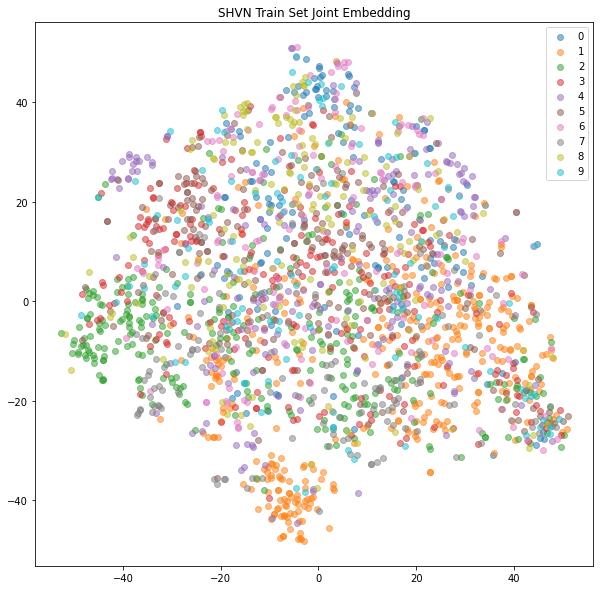

In [358]:
import numpy as np
from sklearn.manifold import TSNE
train_embs=[]
train_labels=[]

for batch in svhn_embds:
  embds=batch[0]
  labels=batch[1]
  for idx in range(len(labels)):
    # print(labels.shape)
    train_embs.append(np.array(embds[idx].detach()))
    train_labels.append(labels[idx].item())
print(train_labels)
X_embedded = TSNE(n_components=2).fit_transform(train_embs)
X_embedded.shape
plot_embeddings(X_embedded,np.array(train_labels),title="SHVN Train Set Joint Embedding")

In [359]:
print(len(svhn_embds[0][1]))

256


[8, 3, 3, 1, 0, 2, 2, 7, 1, 1, 4, 3, 4, 6, 4, 9, 0, 2, 5, 1, 5, 1, 2, 5, 6, 6, 1, 6, 5, 3, 7, 0, 1, 7, 4, 9, 4, 4, 0, 8, 8, 1, 2, 5, 6, 3, 3, 3, 9, 2, 4, 3, 9, 1, 8, 7, 8, 5, 5, 2, 9, 5, 5, 4, 3, 1, 6, 3, 3, 4, 4, 5, 2, 2, 4, 9, 9, 7, 1, 5, 7, 3, 3, 6, 2, 2, 1, 8, 9, 4, 2, 6, 7, 6, 0, 1, 5, 9, 8, 4, 0, 1, 7, 7, 4, 9, 9, 3, 8, 7, 4, 2, 9, 4, 5, 4, 4, 9, 2, 8, 9, 0, 1, 2, 2, 0, 8, 9, 2, 4, 7, 9, 2, 5, 6, 3, 4, 9, 0, 3, 1, 8, 2, 2, 7, 4, 0, 4, 0, 6, 8, 9, 1, 3, 7, 0, 6, 1, 7, 4, 5, 1, 8, 5, 0, 3, 7, 3, 2, 8, 1, 7, 8, 6, 0, 7, 3, 6, 6, 4, 0, 1, 7, 8, 3, 6, 3, 4, 5, 6, 1, 6, 9, 6, 7, 4, 1, 3, 5, 1, 6, 7, 2, 0, 6, 6, 8, 7, 1, 2, 2, 2, 8, 2, 6, 1, 1, 7, 9, 2, 7, 5, 9, 5, 8, 0, 4, 4, 1, 5, 0, 4, 4, 8, 6, 1, 4, 9, 9, 9, 3, 5, 2, 0, 7, 1, 2, 3, 6, 9, 9, 5, 0, 9, 8, 2]


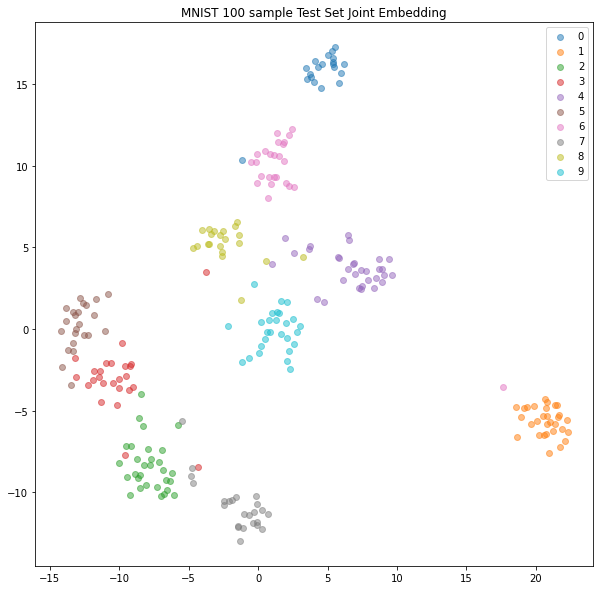

In [360]:
import numpy as np
from sklearn.manifold import TSNE
test_embs=[]
test_labels=[]

for elem in nearestM:
  test_embs.append(np.array(elem[0].detach()))
  test_labels.append(elem[1].detach().item())
print(test_labels)
X_embedded = TSNE(n_components=2).fit_transform(test_embs)
X_embedded.shape
plot_embeddings(X_embedded,np.array(test_labels),title="MNIST 100 sample Test Set Joint Embedding")


If you run into memory issues you can move your model to CPU to process the SVHN encodings.

**Question Grading** If you have trouble getting this to work you may still get partial credit for appropriate methodology. Grading for this question will be as follows:

10 points - appropriate triplet construction and loss function construction

10 points - appropriate nearest neighbor classification evaluation setup 

10 points - obtaining above 50% accuracy, 5 points for getting above 25%

5 points (extra credit) - visualization of the retrieval

5 points (extra credit) - hard negative mining


You can include your answer in a separate notebook or .py file

## Assign03.2.B
https://www.ruoyi.me/files/dynamics.pdf

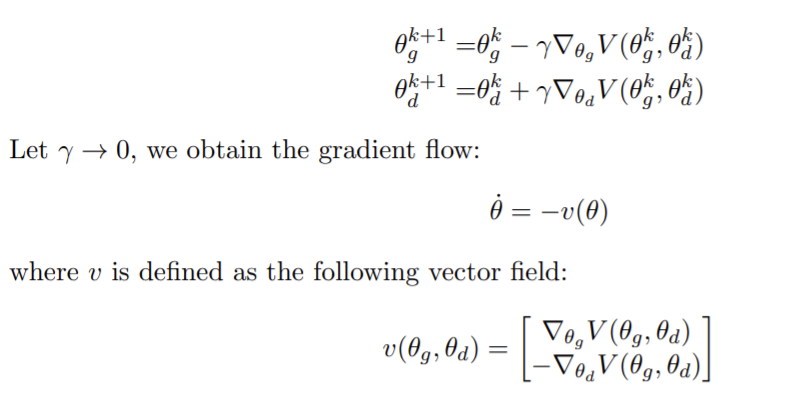
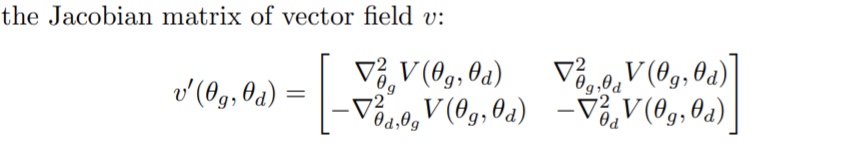

## Assign.03.2.C

If discriminator is under-trained, it guides the generator in the wrong direction

If discriminator is over-trained, it is too “hard” and generator can’t make progress

If generator trains too quickly it will “overshoot” the loss that the discriminator learned

Stationary points are where the gradient of each player w.r.t. its own parameters is 0


A equilibrium in this system is then a point where 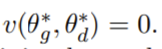

## Assign.03.2.D

The convergence properties of this game is determined by the eigenvalues of the Jacobian of the vector field:

if the absolute values of the eigenvalues of the Jacobian are all smaller than 1, then the fixed-point iteration converges to the fixed point

the convergence of GAN algorithms suffers due to two factors:

• presence of eigenvalues of the Jacobian of the gradient vector field with zero real-part.

• eigenvalues with big imaginary part.

when k goes to infinity the model suffer from oscillations as generator overshoots discriminator

## Assign3.3.A

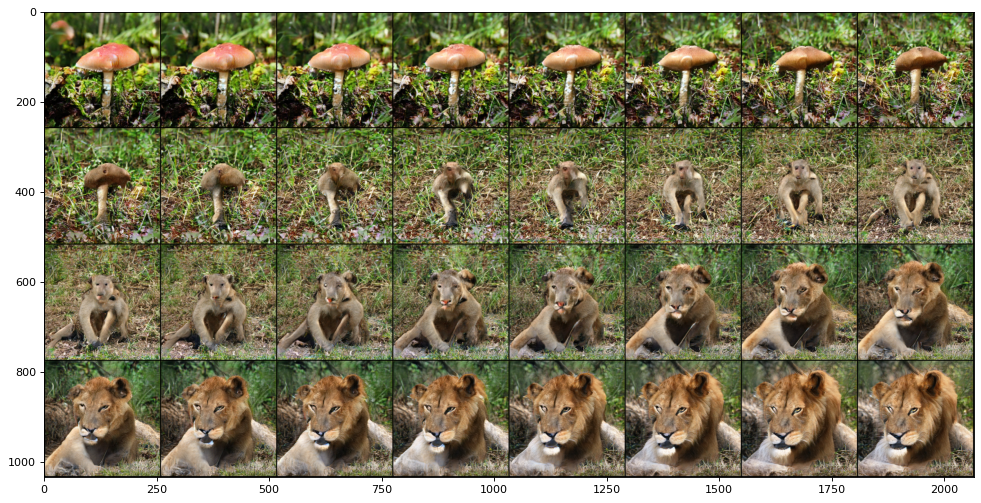